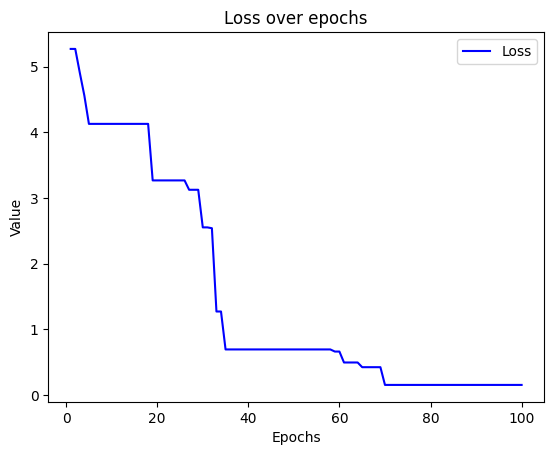

Accuracy: 0.96


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

def relu(x):
  return np.maximum(0, x)

def softmax(x):
  exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def initialize_population(n, input_dim, hidden_dim1, hidden_dim2, output_dim):
  population = []
  # Inisialisasi bobot
  for _ in range(n):
    W1 = np.random.uniform(-2, 2, size=(input_dim, hidden_dim1))
    W2 = np.random.uniform(-2, 2, size=(hidden_dim1, hidden_dim2))
    W3 = np.random.uniform(-2, 2, size=(hidden_dim2, output_dim))
    population.append([W1, W2, W3])
  return population

def compute_loss(weights, inputs, targets):
  # loss cross-entropy
  W1, W2, W3 = weights[0], weights[1], weights[2]
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  layer3_output = softmax(layer3_input)
  loss = -np.mean(np.sum(targets * np.log(layer3_output), axis=1))
  return loss

def scout_bee_search(weights, inputs, targets, max_trials=5):
  # Mencari solusi terbaik di sekitar food source
  best_weights = weights
  best_loss = compute_loss(weights, inputs, targets)

  for _ in range(max_trials):
    trial_weights = perturb_solution(weights)
    trial_loss = compute_loss(trial_weights, inputs, targets)
    if trial_loss < best_loss:
      best_loss = trial_loss
      best_weights = trial_weights

  return best_weights, best_loss

def perturb_solution(weights, perturb_factor=0.1):
  # Menambahkan variasi kecil pada solusi yang ada
  perturbed_weights = []
  for layer_weights in weights:
    perturbed_layer = layer_weights + perturb_factor * np.random.uniform(-2, 2, size=layer_weights.shape)
    perturbed_weights.append(perturbed_layer)
  return perturbed_weights

def train_with_abc(inputs, targets, input_dim, hidden_dim1, hidden_dim2, output_dim, population_size=20, iterations=100, limit=5):
  # Pelatihan jaringan menggunakan algoritma ABC
  best_weights = None
  best_loss = float('inf')
  best_accuracy = 0.0

  population = initialize_population(population_size, input_dim, hidden_dim1, hidden_dim2, output_dim)
  history_loss = []
  history_acc = []

  for epoch in range(iterations):
    for i, bee in enumerate(population):
      bee, loss = scout_bee_search(bee, inputs, targets)
      if loss < best_loss:
        best_loss = loss
        best_weights = bee

    predicted = np.argmax(predict(inputs, best_weights), axis=1)
    true_labels = np.argmax(targets, axis=1)
    accuracy = np.mean(predicted == true_labels)
    history_loss.append(best_loss)
    history_acc.append(accuracy)

    if accuracy > best_accuracy:
      best_accuracy = accuracy

    if epoch % limit == 0:
      population = [perturb_solution(bee) for bee in population]

  return best_weights, history_loss, history_acc, best_accuracy, best_loss

def predict(inputs, weights):
  W1, W2, W3 = weights[0], weights[1], weights[2]
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  layer3_output = softmax(layer3_input)
  return layer3_output

iris = load_iris()
X = iris.data
y = iris.target

num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]

best_weights, history_loss, history_acc, best_accuracy, best_loss = train_with_abc(X, y_one_hot, input_dim=X.shape[1], hidden_dim1=16, hidden_dim2=16, output_dim=num_classes, iterations=100)

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, 'b', label='Loss')
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.show()

print(f'Accuracy: {best_accuracy}')

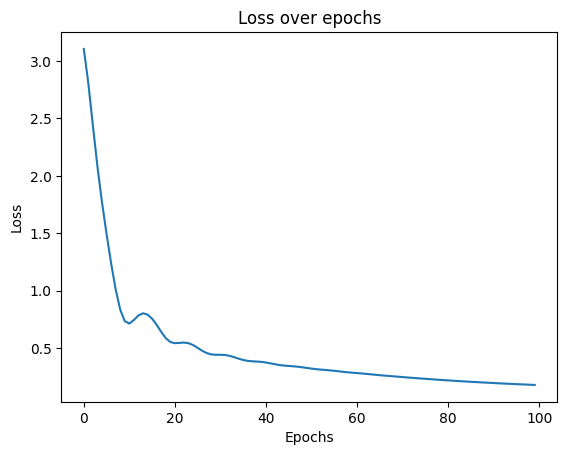

Accuracy: 0.98


In [ ]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def relu(x):
  return np.maximum(0, x)

def softmax(x):
  exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
  return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def initialize_weights(input_dim, hidden_dim1, hidden_dim2, output_dim):
  W1 = np.random.randn(input_dim, hidden_dim1) * np.sqrt(2.0 / input_dim)
  W2 = np.random.randn(hidden_dim1, hidden_dim2) * np.sqrt(2.0 / hidden_dim1)
  W3 = np.random.randn(hidden_dim2, output_dim) * np.sqrt(2.0 / hidden_dim2)
  return W1, W2, W3

def compute_loss(W1, W2, W3, inputs, targets):
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  layer3_output = softmax(layer3_input)
  loss = -np.mean(np.sum(targets * np.log(layer3_output), axis=1))
  return loss

def train_with_adam(inputs, targets, input_dim, hidden_dim1, hidden_dim2, output_dim, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=100):
  W1, W2, W3 = initialize_weights(input_dim, hidden_dim1, hidden_dim2, output_dim)
  mW1, mW2, mW3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
  vW1, vW2, vW3 = np.zeros_like(W1), np.zeros_like(W2), np.zeros_like(W3)
  history_loss = []

  for epoch in range(epochs):
    # Feed Forward
    layer1_output = relu(np.dot(inputs, W1))
    layer2_output = relu(np.dot(layer1_output, W2))
    layer3_input = np.dot(layer2_output, W3)
    layer3_output = softmax(layer3_input)

    # loss cross-entropy
    loss = compute_loss(W1, W2, W3, inputs, targets)
    history_loss.append(loss)

    # Backpropagation
    error = layer3_output - targets
    delta3 = error
    delta2 = np.dot(delta3, W3.T) * (layer2_output > 0)
    delta1 = np.dot(delta2, W2.T) * (layer1_output > 0)

    # Adam optimization
    mW1 = beta1 * mW1 + (1 - beta1) * np.dot(inputs.T, delta1) / inputs.shape[0]
    vW1 = beta2 * vW1 + (1 - beta2) * (np.dot(inputs.T, delta1) ** 2) / inputs.shape[0]
    mW2 = beta1 * mW2 + (1 - beta1) * np.dot(layer1_output.T, delta2) / layer1_output.shape[0]
    vW2 = beta2 * vW2 + (1 - beta2) * (np.dot(layer1_output.T, delta2) ** 2) / layer1_output.shape[0]
    mW3 = beta1 * mW3 + (1 - beta1) * np.dot(layer2_output.T, delta3) / layer2_output.shape[0]
    vW3 = beta2 * vW3 + (1 - beta2) * (np.dot(layer2_output.T, delta3) ** 2) / layer2_output.shape[0]

    W1 -= learning_rate * mW1 / (np.sqrt(vW1) + epsilon)
    W2 -= learning_rate * mW2 / (np.sqrt(vW2) + epsilon)
    W3 -= learning_rate * mW3 / (np.sqrt(vW3) + epsilon)
  return W1, W2, W3, history_loss

def predict(inputs, W1, W2, W3):
  layer1_output = relu(np.dot(inputs, W1))
  layer2_output = relu(np.dot(layer1_output, W2))
  layer3_input = np.dot(layer2_output, W3)
  layer3_output = softmax(layer3_input)
  return layer3_output

iris = load_iris()
X = iris.data
y = iris.target

num_classes = len(np.unique(y))
y_one_hot = np.eye(num_classes)[y]

W1, W2, W3, history_loss = train_with_adam(X, y_one_hot, input_dim=X.shape[1], hidden_dim1=16, hidden_dim2=16, output_dim=num_classes)

plt.plot(history_loss)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

predictions = predict(X, W1, W2, W3)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = np.mean(predicted_labels == y)

print(f'Accuracy: {accuracy}')